Imports

Code based on : https://berkeleyautomation.github.io/gqcnn/tutorials/tutorial.html#training

In [74]:
#Import Required Modules
from gqcnn import GQCNN, SGDOptimizer, GQCNNAnalyzer
from autolab_core import YamlConfig
import numpy as np

In [75]:
#Retreive hyper paramaters from config file 
train_config = YamlConfig('./cluster_dex-net_2.0.yaml')
gqcnn_config = train_config['gqcnn_config']
model_dir = train_config['model_dir']
data_dir = train_config['dataset_dir']

Training

In [76]:
#Training
gqcnn = GQCNN(gqcnn_config)
SGDOptimizer = SGDOptimizer(gqcnn, train_config)

In [82]:
gqcnn = GQCNN.load(model_dir)
print(gqcnn._output_tensor)
# with gqcnn.get_tf_graph().as_default():
#      SGDOptimizer.optimize()

Tensor("Softmax:0", shape=(16, 2), dtype=float32)


Predict

In [56]:
#Predict
images = np.load('../datasets/adv_synth/depth_ims_tf_table_00001.npz')['arr_0']#['array of images']
poses = np.load('../datasets/adv_synth/hand_poses_00001.npz')['arr_0']#['corresponding poses']

#Select only the second column from poses and expand dims
poses = np.expand_dims(poses[:,2], 1)

gqcnn = GQCNN.load(model_dir)
output = gqcnn.predict(images, poses)
pred_p_success = output[:,1]
# gqcnn.close_session()

In [64]:
np.max(pred_p_success)

(array([ 60, 159, 258, 357, 456, 555, 654, 753, 852, 951]),)


INFO:root:Setting up for analysis
INFO:root:Running Predictions
INFO:root:Analyzing model GQ-Adv
INFO:root:Loading model GQ-Adv
INFO:root:Reading file 1 of 190
INFO:root:Reading file 2 of 190
INFO:root:Reading file 3 of 190
INFO:root:Reading file 4 of 190
INFO:root:Reading file 5 of 190
INFO:root:Reading file 6 of 190
INFO:root:Reading file 7 of 190
INFO:root:Reading file 8 of 190
INFO:root:Reading file 9 of 190
INFO:root:Reading file 10 of 190
INFO:root:Reading file 11 of 190
INFO:root:Reading file 12 of 190
INFO:root:Reading file 13 of 190
INFO:root:Reading file 14 of 190
INFO:root:Reading file 15 of 190
INFO:root:Reading file 16 of 190
INFO:root:Reading file 17 of 190
INFO:root:Reading file 18 of 190
INFO:root:Reading file 19 of 190
INFO:root:Reading file 20 of 190
INFO:root:Reading file 21 of 190
INFO:root:Reading file 22 of 190
INFO:root:Reading file 23 of 190
INFO:root:Reading file 24 of 190
INFO:root:Reading file 25 of 190
INFO:root:Reading file 26 of 190
INFO:root:Reading file 

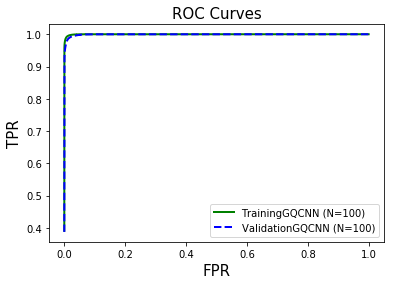

In [41]:
analysis_config = YamlConfig('cfg/tools/analyze_gqcnn_performance.yaml') # Sample config: 'cfg/tools/analyze_gqcnn_performance.yaml'
analyzer = GQCNNAnalyzer(analysis_config)
analyzer.analyze()

Visualise

In [ ]:
from autolab_core import YamlConfig
from gqcnn import GQCNNPredictionVisualizer

In [ ]:
visualization_config = YamlConfig('./cfg/tools/gqcnn_prediction_visualizer.yaml')

In [ ]:
visualizer = GQCNNPredictionVisualizer(visualization_config)
visualizer.visualize()